Task 8: Clustering with K-Means

Objective: Perform unsupervised learning with K-Means clustering.

Tools: Scikit-learn, Pandas, Matplotlib

## 1.Load and visualize dataset (optional PCA for 2D view)

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

In [3]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [10]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
# Select only numerical features (remove CustomerID, Gender if categorical)
X = df.drop(columns=['CustomerID', 'Gender'], errors='ignore')

In [12]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##2.Fit K-Means and assign cluster labels.

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("Cluster centers:\n", kmeans.cluster_centers_)

Cluster centers:
 [[ 0.82935381 -0.00348296 -0.65438593]
 [-0.43033758  1.02223317  1.15593564]
 [-0.98371627 -0.65995549  0.24488394]]


## 3.Use the Elbow Method to find optimal K.

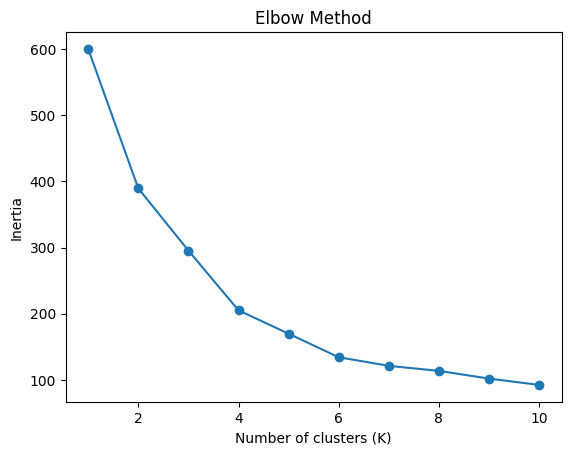

In [15]:
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## 4.Visualize clusters with color-coding.

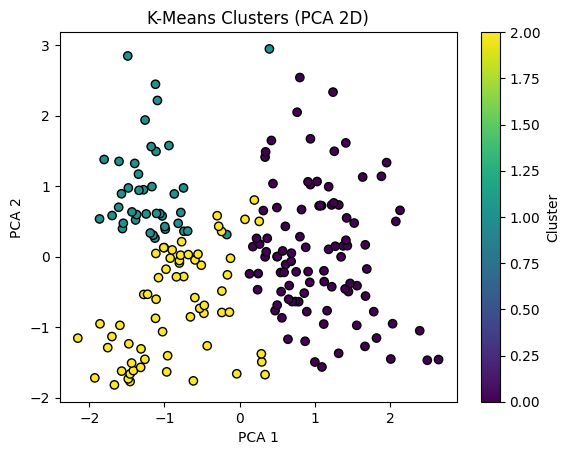

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clusters (PCA 2D)')
plt.colorbar(label='Cluster')
plt.show()

##5.Evaluate clustering using Silhouette Score.

In [17]:
score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.3579234303882264
